In [1]:
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from NeuroDataResource import NeuroDataResource

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
apiKey = pickle.load(open('./data/token.pkl', 'rb'))

In [3]:
def time_download_chunks(resource, channel, zRange, yRange, xRange, zSub, ySub, xSub):
    start = time.time()
    for z in (zRange[0], zRange[1], zSub):
        for y in (yRange[0], yRange[1], ySub):
            for x in (xRange[0], xRange[1], xSub):
                chunk = resource.get_cutout(channel,
                                            zRange = [z, z+zSub],
                                            yRange = [y, y+ySub],
                                            xRange = [x, x+xSub])
    end = time.time()
    return end-start

In [4]:
myResource = NeuroDataResource('api.boss.neurodata.io',
                               apiKey,
                               'collman',
                               'collman15v2',
                               [{'name': 'DAPI1st', 'dtype':'uint8'}])

In [5]:
zRange = [0, 8]
yRange = [0, 512]
xRange = [0, 512]

timeList = []
for z in [1, 2, 4, 8]:
    for xy in [32, 64, 128, 256, 512]:
        print('Testing:\t', 'xy: ', xy, '\tz:', z)
        myTime= time_download_chunks(myResource,
                                    'DAPI1st',
                                    zRange,
                                    yRange,
                                    xRange,
                                    z,
                                    xy,
                                    xy)
        timeList.append([z, xy, myTime])
        
        #since we dont want to hit cache
        xRange = np.add(xRange, [512, 512])
        if xRange[-1] > 6300:
            xRange = [0,512]
            yRange = np.add(yRange, [512, 512])

Testing:	 xy:  32 	z: 1
Testing:	 xy:  64 	z: 1
Testing:	 xy:  128 	z: 1
Testing:	 xy:  256 	z: 1
Testing:	 xy:  512 	z: 1
Testing:	 xy:  32 	z: 2
Testing:	 xy:  64 	z: 2
Testing:	 xy:  128 	z: 2
Testing:	 xy:  256 	z: 2
Testing:	 xy:  512 	z: 2
Testing:	 xy:  32 	z: 4
Testing:	 xy:  64 	z: 4
Testing:	 xy:  128 	z: 4
Testing:	 xy:  256 	z: 4
Testing:	 xy:  512 	z: 4
Testing:	 xy:  32 	z: 8
Testing:	 xy:  64 	z: 8
Testing:	 xy:  128 	z: 8
Testing:	 xy:  256 	z: 8
Testing:	 xy:  512 	z: 8


In [6]:
trace = go.Scatter3d(
    x = [elem[0] for elem in timeList],
    y = [elem[1] for elem in timeList],
    z = [elem[2] for elem in timeList],
    mode='markers',
    marker = dict(
        size=12,
        color=100,
        opacity=.7
    )
)

data = [trace]
layout = go.Layout(margin=dict(l=0, r=0, t=0, b=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

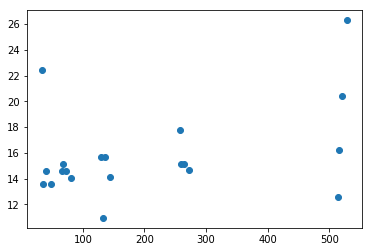

In [7]:
plt.figure()
plt.scatter(
    [elem[1]^2 * elem[0] for elem in timeList],
    [elem[2] for elem in timeList]
)
plt.show()